# Tools & Libraries

In [1]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print(file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

C:\Users\stc\Documents\GitHub\DataScienceAPG\PredictiveAnalyticsPython\stc
C:\Users\stc\Documents\GitHub\DataScienceAPG\PredictiveAnalyticsPython


In [44]:
from pa_lib.job import request_job
from pa_lib.file import project_dir, load_bin, load_csv
from pa_lib.data import desc_col
from datetime import datetime, timedelta

In [3]:
import pandas as pd
import numpy as np

# data import

https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031

In [133]:
url = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/44607195-a2ad-4f9b-b6f1-d26c003d85a2/download/sid_dav_verkehrszaehlung_miv_od2031_2020.csv"
zh_verkehr_2020 = pd.read_csv(url)

In [134]:
url = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/fa64fa70-6328-4d47-bcf0-1eff694d7c22/download/sid_dav_verkehrszaehlung_miv_od2031_2019.csv"
zh_verkehr_2019 = pd.read_csv(url)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
desc_col(zh_verkehr_2020,det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
MSID,object,0/354240,180,22.0 MB,"[Z001M001,Z097M002]"
MSName,object,0/354240,1,22.3 MB,"[Unbekannt,Unbekannt]"
ZSID,object,0/354240,93,20.6 MB,"[Z001,Z097]"
ZSName,object,0/354240,94,37.1 MB,"[A3W (A4 Uetlibergtunnel Brunau),Zollikerstras..."
Achse,object,0/354240,85,27.8 MB,"[A3W,Zürcherstrasse (Badenerstrassse)]"
HNr,object,0/354240,43,21.6 MB,"[1,Unbekannt]"
Hoehe,object,0/354240,98,25.5 MB,"[10m ab Knoten,vor Würzgrabenstrasse]"
EKoord,float64,0/354240,179,2.7 MB,"[2678017.34,2687630.91]"
NKoord,float64,0/354240,179,2.7 MB,"[1242969.91,1253804.18]"
Richtung,object,0/354240,66,27.9 MB,"[A3 und Schimmelstrasse,einwärts]"


In [137]:
desc_col(zh_verkehr_2019)

,DTYPE,NULLS,UNIQUE
MSID,object,0/1579416,182
MSName,object,0/1579416,1
ZSID,object,0/1579416,94
ZSName,object,0/1579416,95
Achse,object,0/1579416,86
HNr,object,0/1579416,48
Hoehe,object,0/1579416,102
EKoord,float64,0/1579416,181
NKoord,float64,0/1579416,181
Richtung,object,0/1579416,66


In [138]:
zh_verkehr = pd.concat([zh_verkehr_2020,zh_verkehr_2019])

In [139]:
zh_verkehr.head().T

,0,1,2,3,4
MSID,Z001M001,Z001M001,Z001M001,Z001M001,Z001M001
MSName,Unbekannt,Unbekannt,Unbekannt,Unbekannt,Unbekannt
ZSID,Z001,Z001,Z001,Z001,Z001
ZSName,Seestrasse (Strandbad Wollishofen),Seestrasse (Strandbad Wollishofen),Seestrasse (Strandbad Wollishofen),Seestrasse (Strandbad Wollishofen),Seestrasse (Strandbad Wollishofen)
Achse,Seestrasse,Seestrasse,Seestrasse,Seestrasse,Seestrasse
HNr,451,451,451,451,451
Hoehe,Unbekannt,Unbekannt,Unbekannt,Unbekannt,Unbekannt
EKoord,2.68301e+06,2.68301e+06,2.68301e+06,2.68301e+06,2.68301e+06
NKoord,1.24394e+06,1.24394e+06,1.24394e+06,1.24394e+06,1.24394e+06
Richtung,auswärts,auswärts,auswärts,auswärts,auswärts


In [166]:
zh_verkehr = zh_verkehr.astype(
    {
        "MessungDatZeit": "datetime64[ns]",
        "LieferDat": "datetime64[ns]",
        # "AnzFahrzeuge": "int64",
    }
)
zh_verkehr.loc[:, "hour"] = zh_verkehr.MessungDatZeit.dt.hour
zh_verkehr.loc[:, "dayofweek"] = zh_verkehr.MessungDatZeit.dt.dayofweek
zh_verkehr.loc[:, "month_name"] = zh_verkehr.MessungDatZeit.dt.month_name()
zh_verkehr.loc[:, "year"] = zh_verkehr.MessungDatZeit.dt.year
zh_verkehr.loc[:, "dayofyear"] = zh_verkehr.MessungDatZeit.dt.dayofyear

In [142]:
import seaborn as sns
sns.set_style("darkgrid")

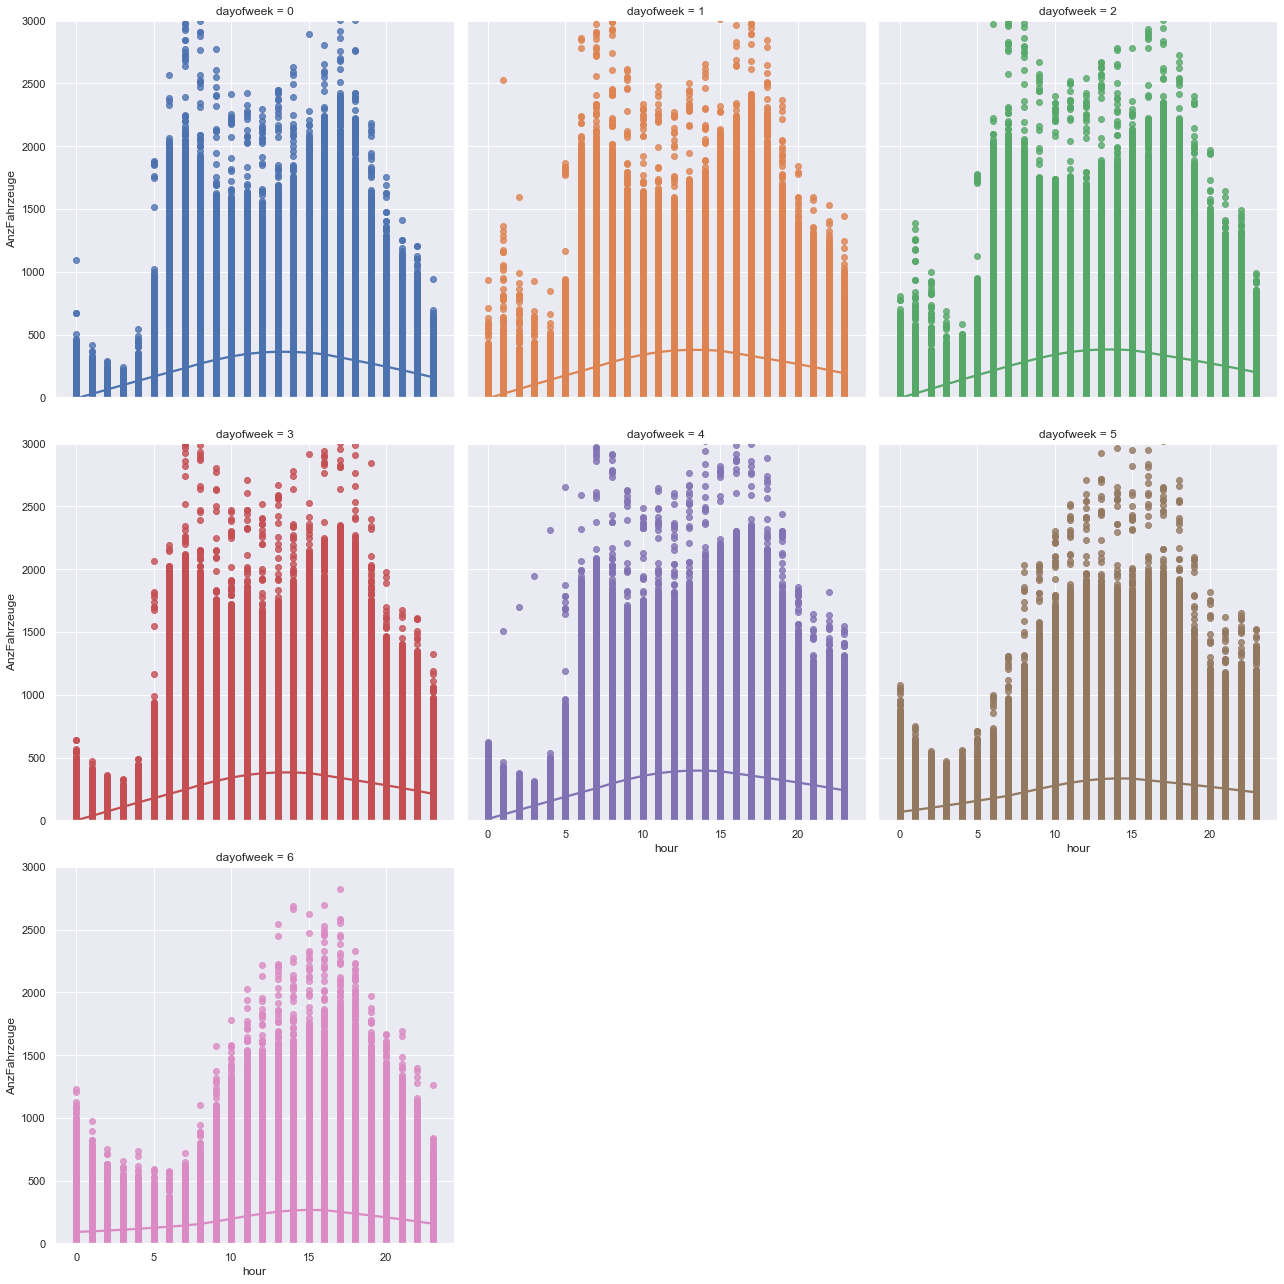

In [143]:
g = sns.lmplot(
    x="hour",
    y="AnzFahrzeuge",
    col="dayofweek",
    hue="dayofweek",  # kinda useless, but nice to look at!
    data=zh_verkehr,
    col_wrap=3,  # How many plots per row
    height=6,
    #order=2,  # polynomial regression of order, best for 1 or 2
    lowess = True,
     ci       = 95,
).set(ylim=(0,3000))

(737060.0, 737506.9583333334)

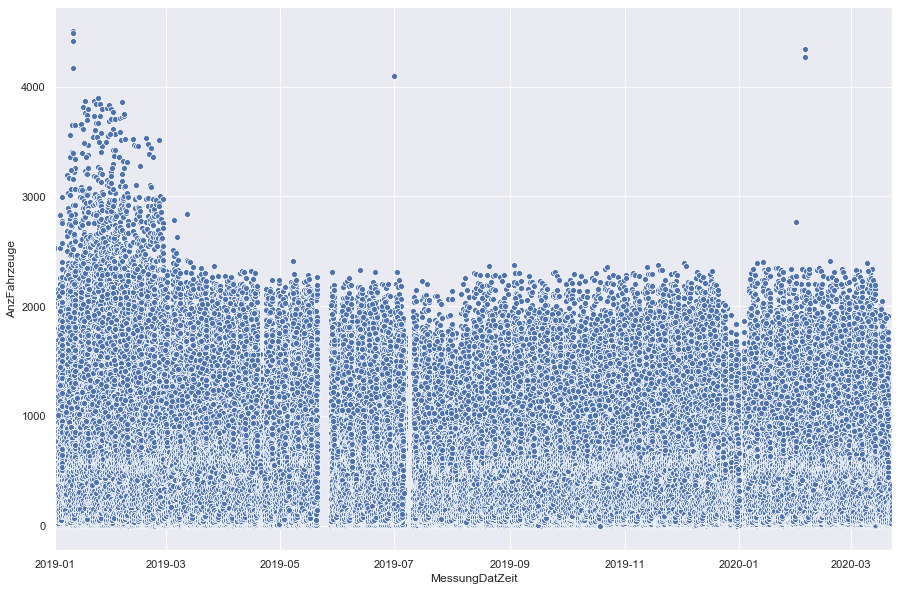

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

ax = sns.scatterplot(x="MessungDatZeit", y="AnzFahrzeuge", data=zh_verkehr)
ax.set_xlim([min(zh_verkehr.MessungDatZeit), max(zh_verkehr.MessungDatZeit)])

In [111]:
import statsmodels.api as sm
import numpy as np
from pa_lib.vis import boxplot_histogram

In [145]:
lowess = sm.nonparametric.lowess

In [148]:
lowess_anzfahrzeuge = lowess(
    exog=zh_verkehr.MessungDatZeit,
    endog=zh_verkehr.AnzFahrzeuge,
    frac=0.05,
    return_sorted=False,
    missing="drop"
)

In [149]:
len(lowess_anzfahrzeuge)

1933656

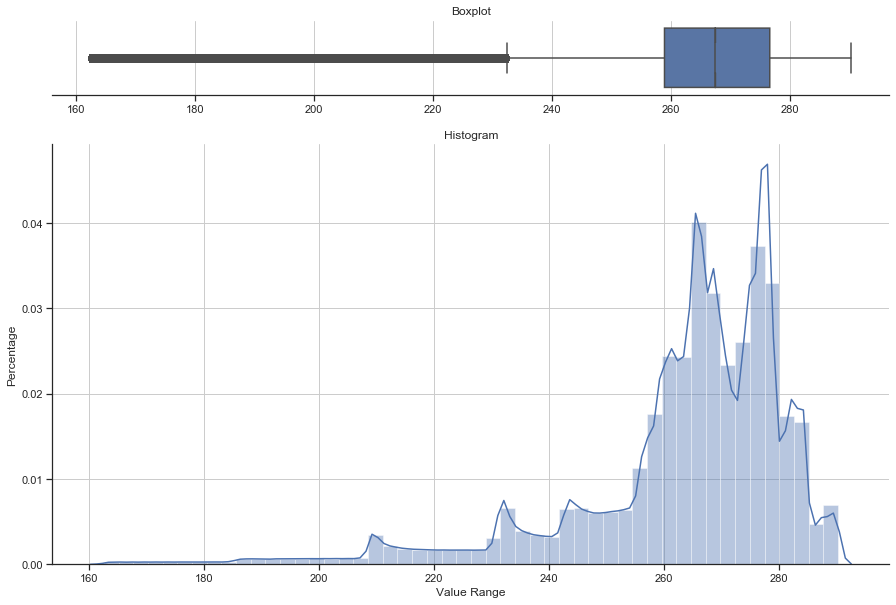

In [150]:
boxplot_histogram(lowess_anzfahrzeuge)

In [151]:
zh_verkehr.loc[:,"anzfahrzeuge_lowess"] = lowess_anzfahrzeuge

(array([737091., 737119., 737150., 737180., 737211., 737241., 737272.,
        737303., 737333., 737364., 737394., 737425., 737456., 737485.,
        737516.]),
 <a list of 15 Text xticklabel objects>)

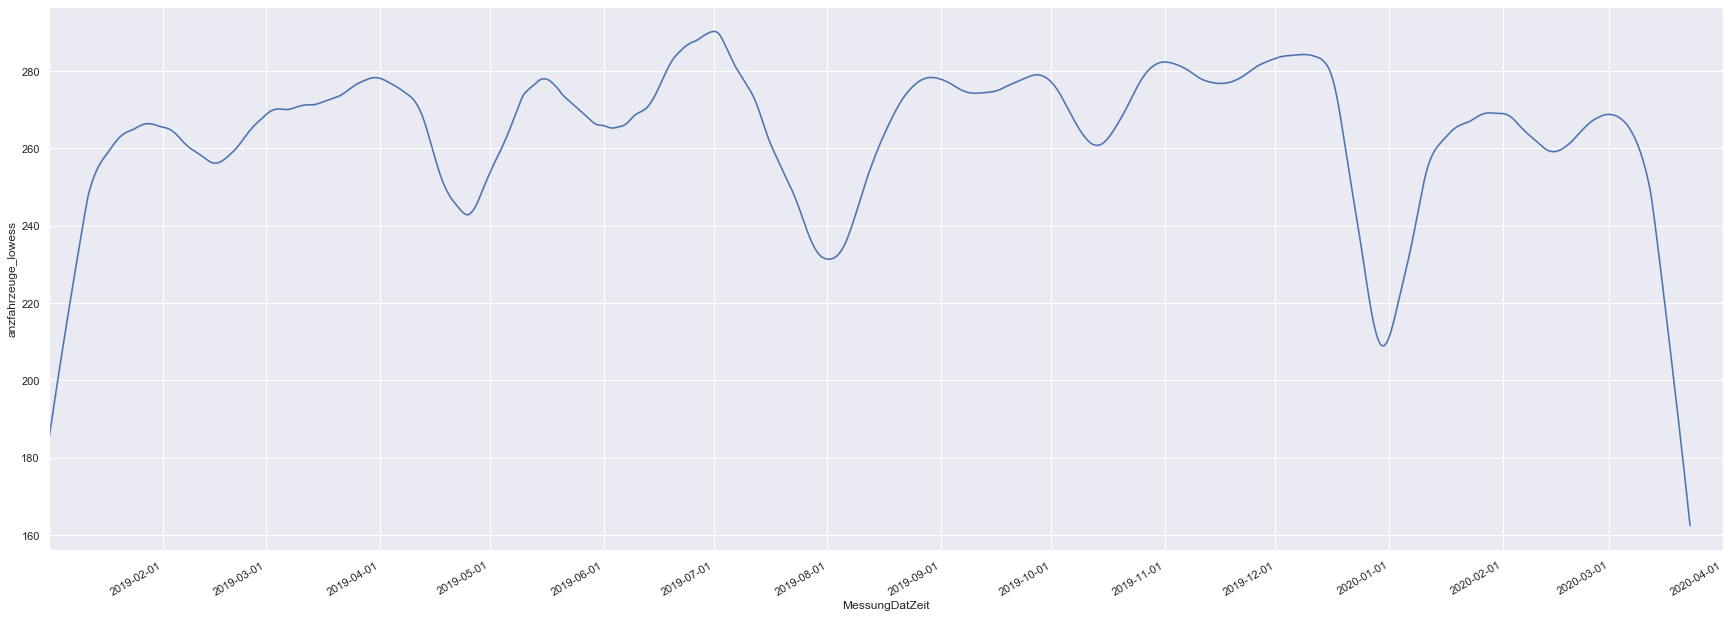

In [163]:
xticks = pd.Series(
    pd.date_range(zh_verkehr.MessungDatZeit.min(), periods=12 * 1 + 3, freq="M")
).map(lambda x: x + timedelta(days=1))

sns.set_style("darkgrid")
plt.figure(figsize=(30, 10))
ax = sns.lineplot(x="MessungDatZeit", y="anzfahrzeuge_lowess", data=zh_verkehr)
ax.set_xlim([min(zh_verkehr.MessungDatZeit), max(zh_verkehr.MessungDatZeit)])
ax.set_xticks(xticks)
plt.xticks(rotation=30, ha="right")

# plt.savefig("anz_fahrzeuge_pro_mespro_stunde")

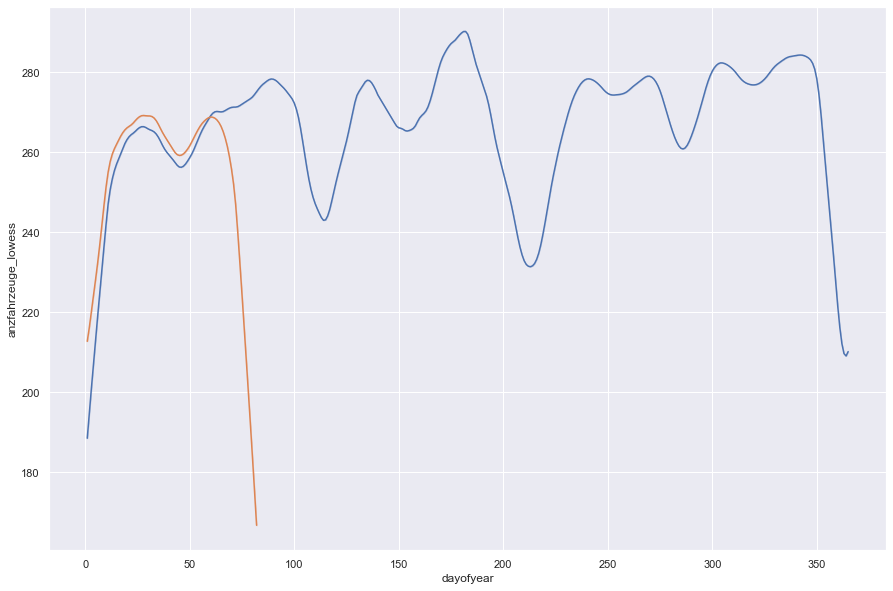

In [171]:
plt.figure(figsize=(15,10))
for _year_ in [2019, 2020]:
    ax = sns.lineplot(
        x="dayofyear",
        y="anzfahrzeuge_lowess",
        data=zh_verkehr[zh_verkehr.year == _year_],
    )
plt.savefig("anz_cars_01.png")